<a href="https://colab.research.google.com/github/MINIVO2/Neural_Network_classification_with_Tensorflow/blob/main/02_neural_network_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classification with TensorFlow

1. Binary classification
2. Multiclass Classification
3. Multilevel Classification

##creating a data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#make 100 samples
n_sample = 1000

#create circles
X,y = make_circles(n_sample, noise=0.03, random_state = 42)


In [ ]:
#features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
#Visualizing the data
import pandas as pd
X1 = pd.DataFrame(X)

y1 = pd.DataFrame(y)
X1, y1

(            0         1
 0    0.754246  0.231481
 1   -0.756159  0.153259
 2   -0.815392  0.173282
 3   -0.393731  0.692883
 4    0.442208 -0.896723
 ..        ...       ...
 995  0.244054  0.944125
 996 -0.978655 -0.272373
 997 -0.136900 -0.810012
 998  0.670362 -0.767502
 999  0.281057  0.963824
 
 [1000 rows x 2 columns],
      0
 0    1
 1    1
 2    1
 3    1
 4    0
 ..  ..
 995  0
 996  0
 997  1
 998  0
 999  0
 
 [1000 rows x 1 columns])

In [ ]:
#Create a dataframe all together

circles = pd.DataFrame({"X0": X[:,0], "X1" : X[:,1], "Label" : y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


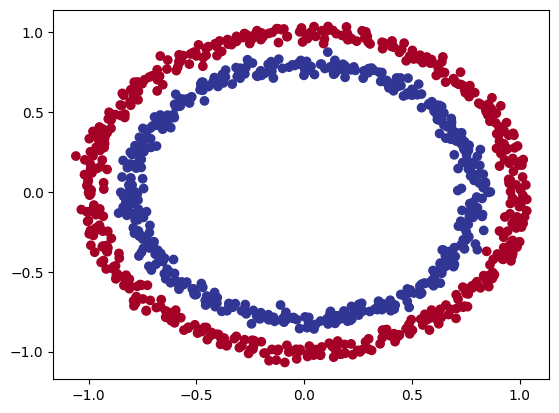

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
circles["Label"].value_counts()

Label
1    500
0    500
Name: count, dtype: int64

##Input And Output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in Modelling




##model 1

In [ ]:
import tensorflow as tf

In [ ]:
#Set seed
tf.random.set_seed(42)

#create a model with one layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
model_1.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 4.3317 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.0031 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.5478 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 2.9047 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.4388 - accuracy: 0.5000


It is just giving 50% accuracy which means its just guessing , lets try by increasing the time


In [ ]:
model_1.fit(tf.expand_dims(X, axis = -1),y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 1.1743 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 1.1438 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 1.1191 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0990 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0800 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0618 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0462 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0306 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0175 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0047 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4983


[0.6931443214416504, 0.49834373593330383]

##model 2 (increase the number of layers)

In [ ]:

tf.random.set_seed(42)

#create a model with one layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#fit the model
model_2.fit(tf.expand_dims(X, axis = -1), y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 2.2623 - accuracy: 0.4981
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7309 - accuracy: 0.5007
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5009
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4986
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4970
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5023
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4969
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4940
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4947
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5010
Epoch 11/

In [ ]:
#evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935105323791504, 0.5]

In [ ]:
circles["Label"].value_counts()

Label
1    500
0    500
Name: count, dtype: int64

## Improving our model (model 3)

Let's look into our bag of tricks to see how we can improve our model.

Let's look into our

1. Create a model we might to add more layers or increase the number of hidden units within a layers.

2. Compiling a model here we might to choose a different optimization function such as Adam instead of SGD.

3. Fitting a model perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#set random seed
tf.random.set_seed(42)

#create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(tf.expand_dims(X, axis = -1), y, epochs = 200, verbose = 0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4982


[0.6936841011047363, 0.49821874499320984]

#plot decesion boundary fuction

to visulize our model's predictions, let's create a function plot_decision_boundary()`, this function will:

To visulize our model's pre plot decision_boundary().

Take in a trained model, features (X) and labels (y)

Take in a trained model, fi

Create a meshgrid of the different X values

• Create a meshgrid of the

Make predictions across the meshgrid

* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing multiclass classification


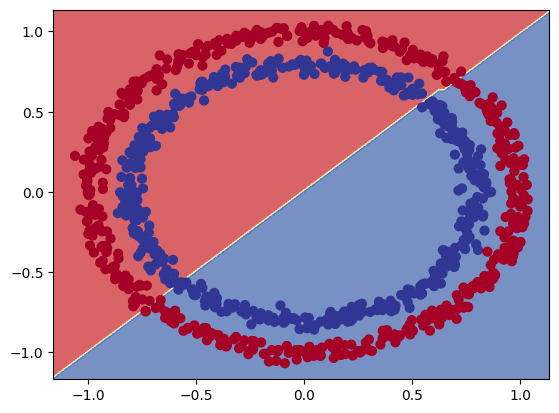

In [ ]:
plot_decision_boundary(model_3,X,y)

#lets see if our model can be used for a regression problem

In [ ]:
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100,1100,5)

X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
#fit the regression models in 3(since its is binary model it will throw error)
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: -3836.1074 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: -7147.9941 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

##reg_model

In [ ]:
#create random seed
tf.random.set_seed(42)

#create a regression model
reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
reg_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"])
#fit the model
reg_model.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 312.2903 - mae: 312.2903
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 181.4726 - mae: 181.4726
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 65.3621 - mae: 65.3621
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 77.3957 - mae: 77.3957
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 80.6238 - mae: 80.6238
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 49.7123 - mae: 49.7123
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 48.1998 - mae: 48.1998
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.2088 - mae: 42.2088
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 44.1169 - mae: 44.1169
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4098 - mae: 42.4098
Epoch 11/100
5/5 [==============================] - 0s 

In [ ]:
#prediction of regression model
reg_model_pred = reg_model.predict(X_reg_test)
reg_model_pred


2/2 [==============================] - 0s 5ms/step


array([[ 888.6155 ],
       [ 894.4751 ],
       [ 900.3347 ],
       [ 906.1943 ],
       [ 912.05383],
       [ 917.9136 ],
       [ 923.7732 ],
       [ 929.63293],
       [ 935.4923 ],
       [ 941.352  ],
       [ 947.2117 ],
       [ 953.0711 ],
       [ 958.9311 ],
       [ 964.7905 ],
       [ 970.6501 ],
       [ 976.50977],
       [ 982.3694 ],
       [ 988.2289 ],
       [ 994.08856],
       [ 999.94824],
       [1005.8078 ],
       [1011.6675 ],
       [1017.52704],
       [1023.38666],
       [1029.2462 ],
       [1035.1058 ],
       [1040.9655 ],
       [1046.8251 ],
       [1052.6847 ],
       [1058.5444 ],
       [1064.404  ],
       [1070.2637 ],
       [1076.1233 ],
       [1081.9829 ],
       [1087.8424 ],
       [1093.702  ],
       [1099.5618 ],
       [1105.4214 ],
       [1111.281  ],
       [1117.1404 ],
       [1123.0002 ],
       [1128.8599 ],
       [1134.7195 ],
       [1140.5789 ],
       [1146.4387 ],
       [1152.2982 ],
       [1158.158  ],
       [1164.

In [ ]:
def plot_prediction(X_train, y_train, X_test, y_test, prediction):
  plt.figure(figsize=(10,7))

  #plot for training data
  plt.scatter(X_train,y_train, c = "b" , label = "Training data")

  #plot for test data
  plt.scatter(X_test, y_test, c = "g", label = "Test data")

  #plot for prediction data against test data
  plt.scatter(X_test, prediction , c = "r", label = "Predictions")

  plt.legend()

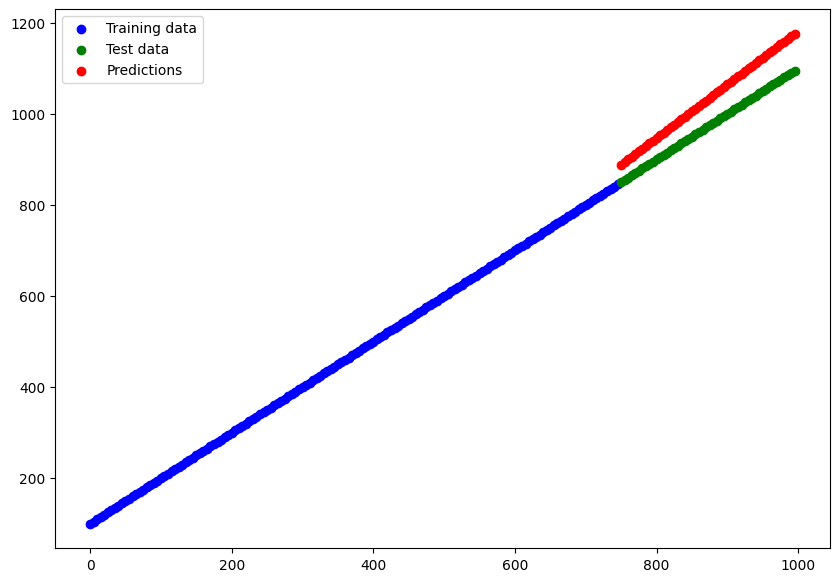

In [ ]:
plot_prediction(X_reg_train,y_reg_train, X_reg_test, y_reg_test, reg_model_pred)

##The missing piece : non-linearity(model 4)

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create the model
model_4  = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
    #activation = "linear"
    ])

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_4.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2709 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1853 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0980 - accuracy: 0.4999
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0443 - accuracy: 0.4999
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9570 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7686 - accuracy: 0.4982
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6329 - accuracy: 0.4991
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4352 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.2596 - accuracy: 0.4989
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1538 - accuracy: 0.4982
Epoch 11/

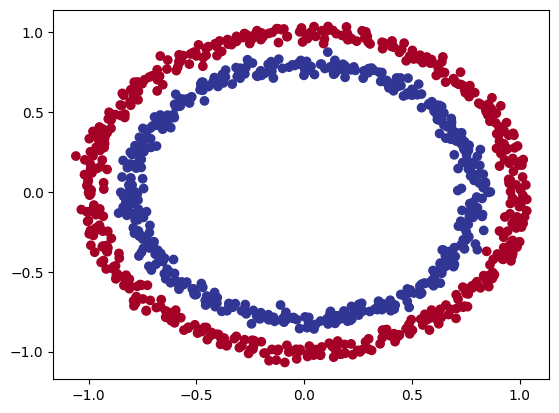

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


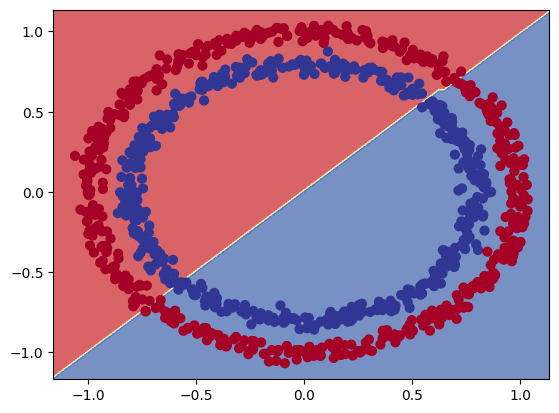

In [ ]:
#decesion boundary for our model
plot_decision_boundary(model_4, X,y)

##nonlinear ACTIVATION (model5)

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "relu")
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics= ["accuracy"])

model_5.fit(tf.expand_dims(X, axis = -1), y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 4.2257 - accuracy: 0.4997
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 4.1944 - accuracy: 0.4985
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 4.1430 - accuracy: 0.4982
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 4.1182 - accuracy: 0.4992
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 4.1106 - accuracy: 0.4985
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 4.0414 - accuracy: 0.5004
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 4.0299 - accuracy: 0.4985
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 3.9921 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 3.9583 - accuracy: 0.4983
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 3.8917 - accuracy: 0.4992
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


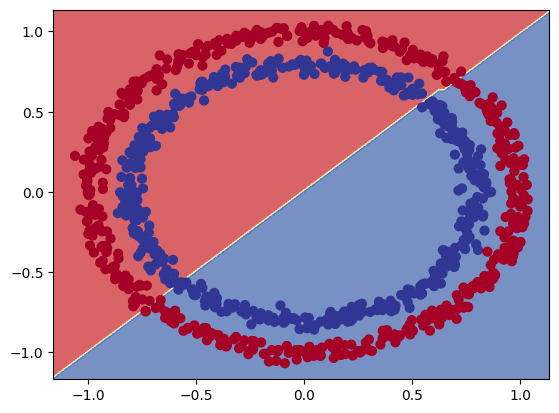

In [ ]:
plot_decision_boundary(model_5, X, y)

##model 6

In [ ]:
#time to replicate from tensorflow playground
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["accuracy"])


model_6.fit(X, y, epochs = 100)




Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.8833 - accuracy: 0.4520
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5952 - accuracy: 0.4670
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3681 - accuracy: 0.4630
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1247 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8826 - accuracy: 0.4630
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6679 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2110 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8942 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8264 - accuracy: 0.4570
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.5900


[0.6657535433769226, 0.5899999737739563]

313/313 [==============================] - 1s 1ms/step
doing binary classification


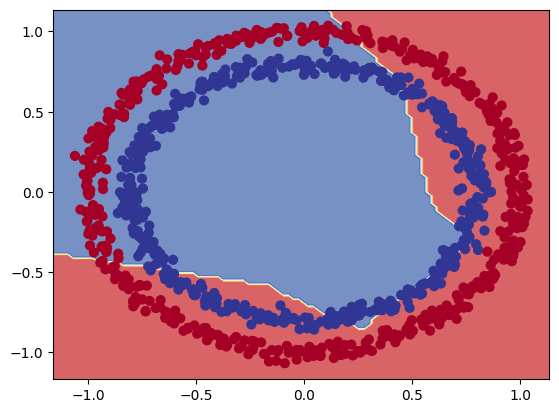

In [ ]:
plot_decision_boundary(model_6, X, y)

##the last model (model 7)

In [ ]:
#time to replicate from tensorflow playground
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["accuracy"])


model_7.fit(X, y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5080
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5030
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4950
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4860
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5050
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5080
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5080
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5020
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9950


[0.0973026379942894, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification


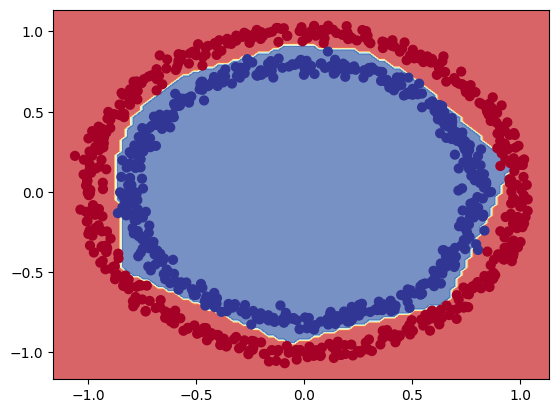

In [ ]:
plot_decision_boundary(model_7, X, y)

**the combination of linear(straight lines ) and non linear(not straight lines)is one of the key fundamentals of neural network**

In [ ]:
A = tf.range(-10,10, dtype = tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

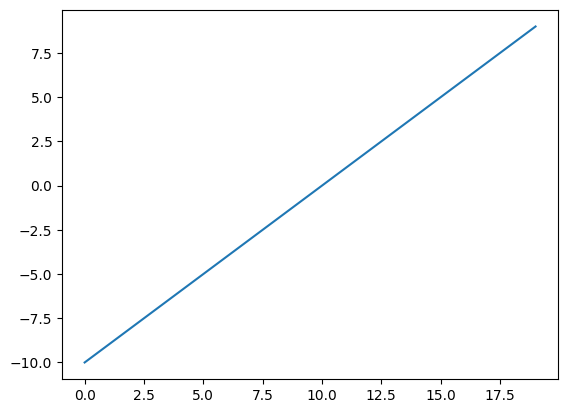

In [ ]:
plt.plot(A)

In [ ]:
#create a sigmoid funtion

def sigmoid(X):
  return 1 / (1 + tf.exp(-X))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

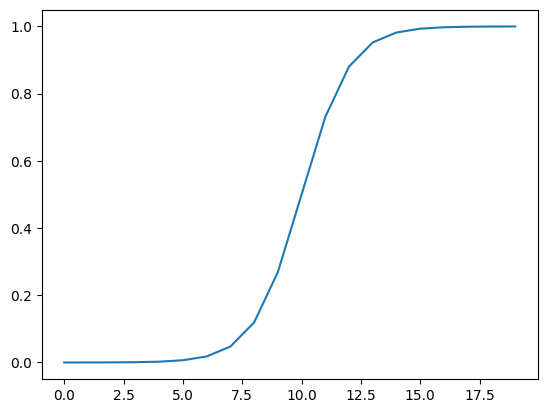

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
#create Relu function

def relu(x):
  return tf.maximum(x, 0)


relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

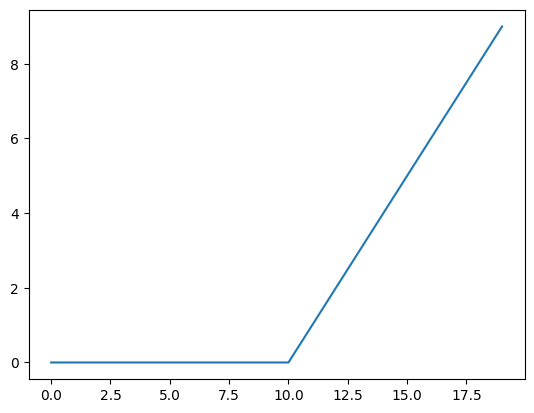

In [ ]:
#plot rely

plt.plot(relu(A))

In [ ]:
#create linear
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

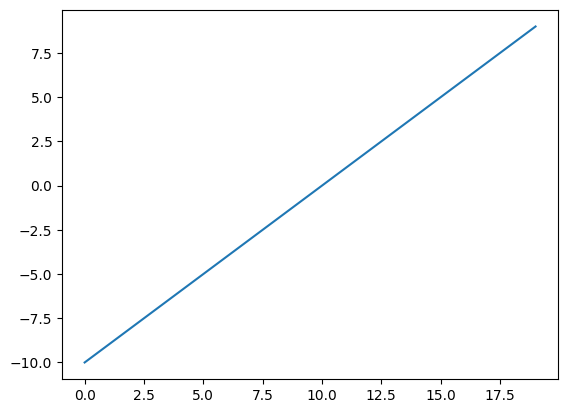

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
#does it even change
A== tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#Evaluating and improving our classification

##model 8

In [ ]:
# from sklearn.model_selection import train_test_split

# X_test, X_train, y_test, y_train = train_test_split(X, y, train_size = 0.2, random_state = 42)

# X_test.shape, X_train.shape, y_train.shape

X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

X_train.shape, y_train.shape

((800, 2), (800,))

In [ ]:
#let recreate a model to fit on training data and evaluate on testing data
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),

])

model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

history = model_8.fit(X_train, y_train, epochs = 200)


Epoch 1/200
25/25 [==============================] - 2s 4ms/step - loss: 0.7202 - accuracy: 0.4700
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.4888
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.4787
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.4812
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4787
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4762
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4750
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4725
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4688
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4638
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


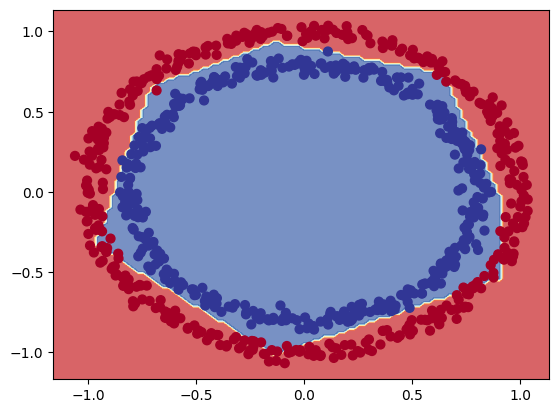

In [ ]:
#trained model
plot_decision_boundary(model_8,X_train, y_train)

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9500


[0.20482730865478516, 0.949999988079071]

313/313 [==============================] - 0s 1ms/step
doing binary classification


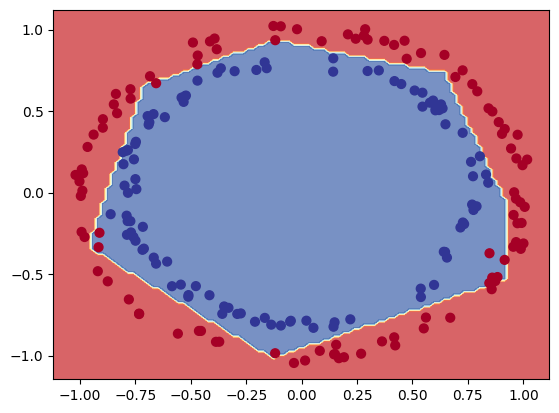

In [ ]:
#test model
plot_decision_boundary(model_8,X_test, y_test)

##plot the loss(training set)

In [ ]:
#convert history object into data frame
pd.DataFrame(history.history)

,loss,accuracy
0,0.720216,0.47000
1,0.713214,0.48875
2,0.708700,0.47875
3,0.705157,0.48125
4,0.702781,0.47875
...,...,...
195,0.220776,0.95875
196,0.219318,0.95375
197,0.217690,0.96250
198,0.215689,0.95875


##plot the loss curve

Text(0.5, 1.0, 'model_8 loss curve')

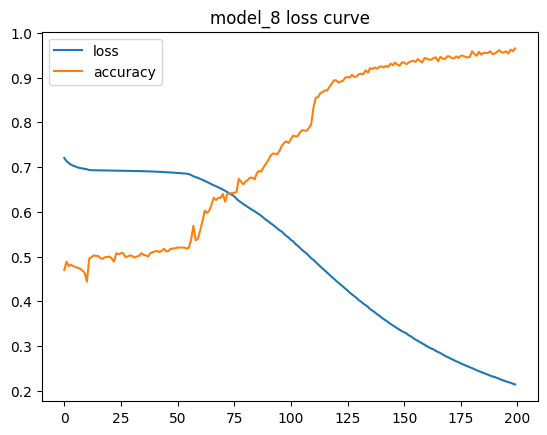

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curve")

##finding the best learning rate

to find the ideal learning rate we need to know the following steps

1. learning rate callback

2. Another model

3. modified loss curves plot

## model 9

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics= ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 **(epoch/20)) #start from 10-4 and increases by  *10**epochs

history = model_9.fit(X_train,y_train, epochs = 100,callbacks = [lr_scheduler] ) #there can be multiple call backs

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 1.3891 - accuracy: 0.4512 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3115 - accuracy: 0.4350 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2669 - accuracy: 0.4175 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2320 - accuracy: 0.4125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2005 - accuracy: 0.4087 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1716 - accuracy: 0.4112 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1451 - accuracy: 0.4125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1190 - accuracy: 0.4250 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

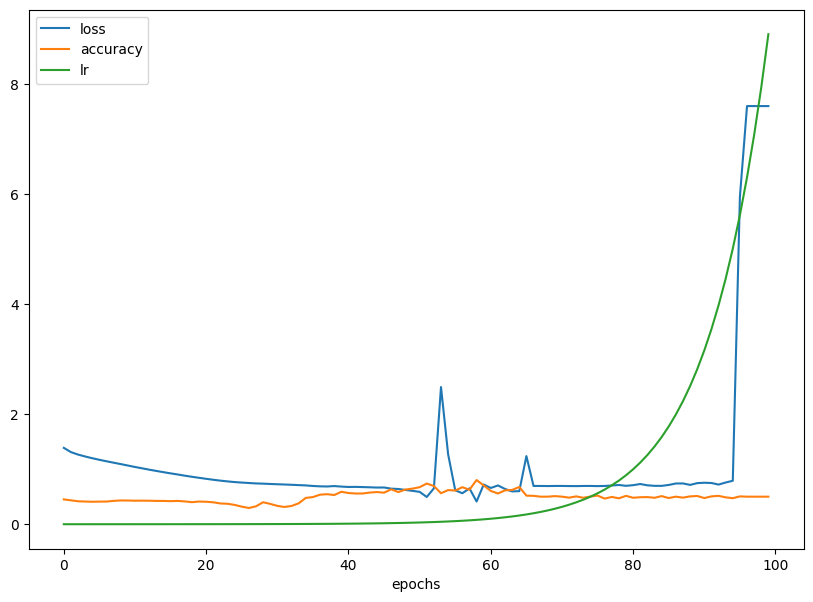

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel = "epochs")

ValueError: x and y must have same first dimension, but have shapes (40,) and (100,)

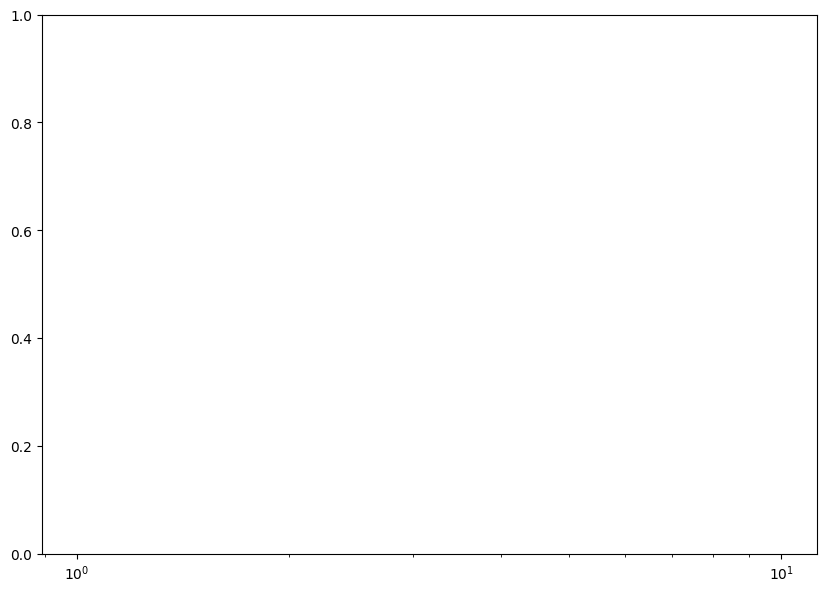

In [ ]:
lrs = 1e-3 *(10 **(tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs , history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")


0.001 is the best learning rate

###lets try using a higher *ideal* learning rate with the same model as before

##model 10

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),

])

model_10.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.017),
                 metrics = ["accuracy"])




model_10.fit(X_train, y_train, epochs = 20)

In [ ]:
#evaluate model 10 on test data set

model_10.evaluate(X_test, y_test)

In [ ]:
#evaluate model 8 on test data set

model_8.evaluate(X_test, y_test)

In [ ]:
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10, X_train , y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10, X_test, y_test)


#more classification evaluation methods

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)

print(f"loss on test set of model 10 : {loss}")
print(f"accuracy on test set model 10 : {(accuracy * 100):.2f}%")

##how about a confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix

# # the true values are y_test and prediction values are.....
y_pred = model_10.predict(X_test)

# confusion_matrix(y_test, y_pred)

In [ ]:
y_pred[:10]

In [ ]:
y_test[:10]

Since y_pred is in binary we have to convert them

In [ ]:
tf.round(y_pred)[:10]

In [ ]:
#create confusion marix
confusion_matrix(y_test, tf.round(y_pred))

#Working with multiclass - Classification

when you have more than two classes as an option , its known as **Multiclass classification** eg :- 3 classes

we are working to build model to distinguis in fashion model industry

https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [ ]:
print(f"Training Sample:\n{train_data[0]}\n")
#or
#train_data[0]
print(f"Training Labels:\n{train_labels[0]}\n")

In [ ]:
train_data[0].shape, train_labels[0].shape #train data is vector so it has shape
#train label is scalar so it does not have shape

In [ ]:
#plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [ ]:
#plot sample

train_labels[0]

In [ ]:
#create a small list so we can index onto our training data

class_names = ["T-shirt/top","Trouser", "Pullover","Dress","Coat", "Sandal", "Shirt", "Sneaker","Bag"	,"Ankle boot"]

len(class_names)

In [ ]:
#plot an example image and its label

index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [ ]:
#plot multiple examples
import random

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##building a multi class classification model (Model11) *hot encoded

we can use a similar architecture as binary classification

input shape = 28 X 28(the shape of one image)

outputshape = 10(one per class of clothing)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])



history_11 = model_11.fit(train_data,tf.one_hot(train_labels, depth = 10), epochs = 10, validation_data=(test_data, tf.one_hot(test_labels, depth = 10)))

we can **one- hot encode on labels** and use the CategoricalCrossentropy or if we have to use the **integer then SparseCategoricalCrossentropy**

In [ ]:
model_11.summary()

we have to normalize the data into 0s and 1s for better understanding

In [ ]:
train_data.max(), train_data.min(), test_data.max()

In [ ]:
#normalize the following training data into 0s and 1s by deviding the training data with max
train_data_norm = train_data/255
test_data_norm= test_data/255

In [ ]:
train_data_norm.max(), train_data_norm.min()

##normalize model (model 12) *not hot encoded

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

model_12_hist = model_12.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

In [ ]:
#plot the loss curve

# Create a subplot with 1 row and 2 columns, and set the first subplot as active
plt.subplot(1, 2, 1)
# Plot the history of model_12
pd.DataFrame(model_12_hist.history).plot(title="Model 12 Normalized", ax=plt.gca())

# Set the second subplot as active
plt.subplot(1, 2, 2)
# Plot the history of history_11
pd.DataFrame(history_11.history).plot(title="Model 11 Non-Normalized", ax=plt.gca())

# Show the plots
plt.tight_layout()
plt.show()


**Note** when comparing the the same with diff data can produce dramtically different results when *Normalized*

##Finding the ideal learning Rate (Model 13)

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "Softmax"),
])

model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))
history_12 = model_12.fit(train_data_norm, train_labels, epochs = 40, callbacks = (lr_scheduler), validation_data = (test_data_norm, test_labels))


In [ ]:
pd.DataFrame(history_12.history).plot(figsize = (10,7), xlabel = "epochs")

In [ ]:
lrs = 1e-3 *(10 **(tf.range(40)/20))
plt.semilogx(lrs , history_12.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")

In [ ]:
10**-4

## Model 14 after fixing its LR

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "Softmax"),
])

model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.002),
    metrics = ["accuracy"]
)

history_14 = model_14.fit(train_data_norm, train_labels, epochs = 20, validation_data = (test_data_norm, test_labels))


##evaluating our multi-class classification

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict probabilities
y_probs = model_14.predict(test_data_norm)

# Convert predicted probabilities to predicted class labels
y_pred = np.argmax(y_probs, axis=1) #argmax return the highest

# y_pred[:20], y_probs[:20]

confusion_matrix(test_labels, y_pred)

##Plot random image function

In [ ]:
import random

def plot_random_images(model, images, true_labels, classes):

  #get a random integer
  i = random.randint(0, len(images))

  # get the targeted image through the random integer
  target_image = images[i]

  #use the model to get the prediction
  pred_probs = model_14.predict(images[i].reshape(1,28, 28))
  #get the predicted label
  pred_label = classes[pred_probs.argmax()]

  true_labels = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  #change the color of the titles
  if pred_label == true_labels:
    color= "green"
  else:
    color = "red"


   # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_labels),
             color=color) # set the color to green or red based on if prediction is right or wrong







In [ ]:
# Check out a random image as well as its prediction
plot_random_images(model_14, test_data_norm, test_labels, class_names)


#what layers are our model learning on?

In [ ]:
model_14.layers


In [ ]:
model_14.layers[1]

In [ ]:
weights , biases = model_14.layers[1].get_weights()

weights, weights.shape

In [ ]:
model_14.summary() #one value per data param

In [ ]:
biases, biases.shape #one calue per hidden unit

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

##understanding the shape of the model by using plot_model

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

#Practice

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd



In [ ]:
X[:10]

In [ ]:
y[:10]

In [ ]:
pd.DataFrame(X)

In [ ]:
moons = pd.DataFrame( {"X0" : X[:,0], "X1" : X[:, 1], "Label": y})
moons

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c= y, cmap = plt.cm.RdYlBu )

In [ ]:
moons["Label"].value_counts()



In [ ]:
X.shape, y.shape

In [ ]:
tf.random.set_seed(42)
moon_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = "relu"),

    tf.keras.layers.Dense(1, activation ="sigmoid")

])

moon_model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ["accuracy"])

jistory = moon_model_1.fit(X, y, epochs = 200)


In [ ]:
moon_model_1.evaluate(X,y)


In [ ]:
plot_decision_boundary(moon_model_1,X,y )

In [ ]:
tf.random.set_seed(42)
moon_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = "relu"),

    tf.keras.layers.Dense(1, activation ="sigmoid")

])

moon_model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_2 = moon_model_2.fit(X, y, epochs = 200, callbacks = (lr_scheduler))


In [ ]:
lrs = 1e-4*(10**(tf.range(200)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("learnin rate")
plt.ylabel("loss")

In [ ]:
tf.random.set_seed(42)
moon_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = "relu"),

    tf.keras.layers.Dense(1, activation ="sigmoid")

])

moon_model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ["accuracy"])



history_3 = moon_model_3.fit(X, y, epochs = 200)